In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [77]:
data = pd.read_csv(r'c:\Users\prashant\Downloads\archive (1)\bank-additional-full.csv',delimiter=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [79]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [80]:
#rename column attribute
data = data.rename(columns = {'emp.var.rate' : 'emp_var_rate', 'cons.price.idx' : 'cons_price_idx', 
                          'cons.conf.idx' : 'cons_conf_idx', 'nr.employed' : 'nr_employed'})
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [81]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [82]:
#describe the data
data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [83]:
#correlation from data
data.corr()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


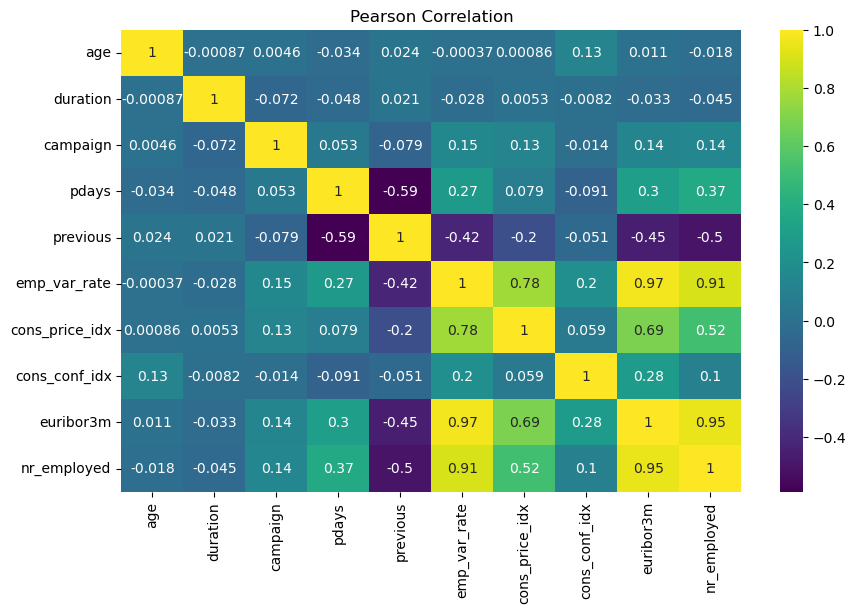

In [84]:
plt.figure(figsize = (10,6))
sns.heatmap(data.corr(), annot = True, cmap = 'viridis')
plt.title("Pearson Correlation")
plt.show()

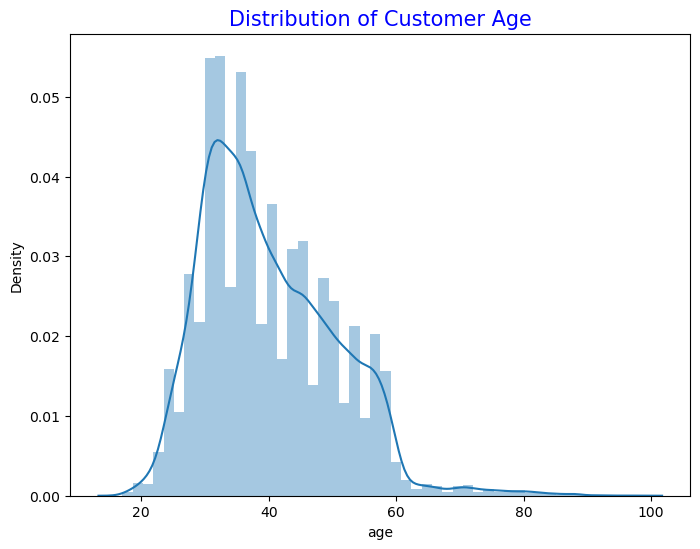

In [85]:
plt.figure(figsize = (8,6))
sns.distplot(data['age'])
plt.title("Distribution of Customer Age", fontsize = 15, color = 'b')
plt.show()

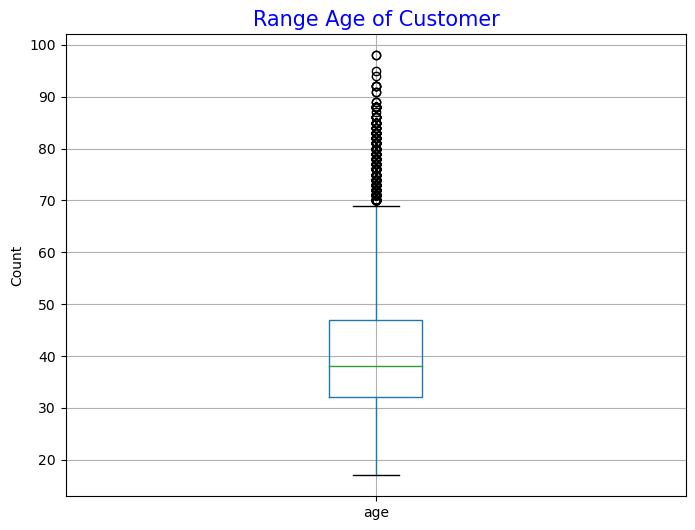

In [86]:
plt.figure(figsize = (8,6))
data.boxplot(column = 'age')
plt.title('Range Age of Customer', fontsize = 15, color = 'b')
plt.ylabel('Count')
plt.show()

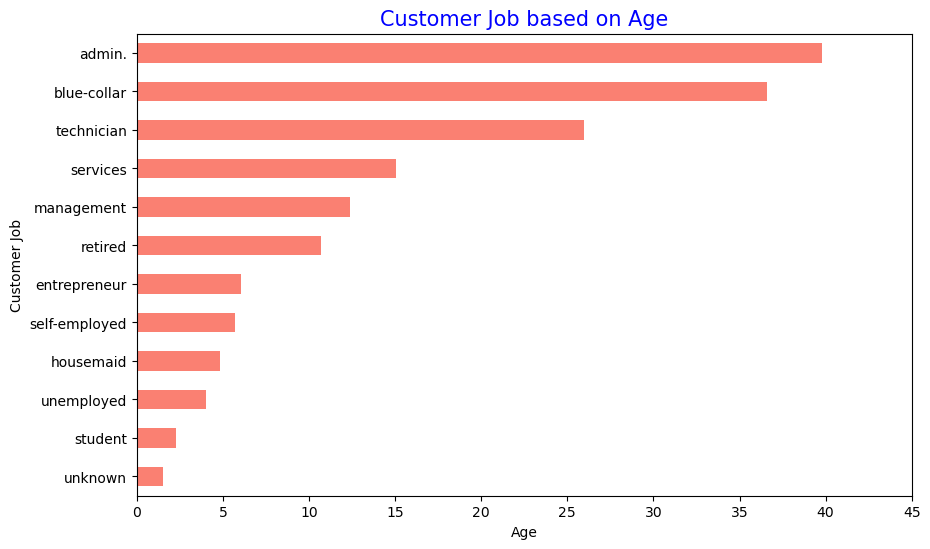

In [87]:
plt.figure(figsize = (10,6))
data.groupby('job')['age'].sum().sort_values(ascending = True).plot(kind = 'barh', color = 'salmon')
plt.title('Customer Job based on Age', fontsize = 15, color = 'blue')
plt.xlabel('Age')
plt.ylabel('Customer Job')
labels, locations = plt.xticks()
plt.xticks(labels, (labels/10000).astype(int))
plt.show()

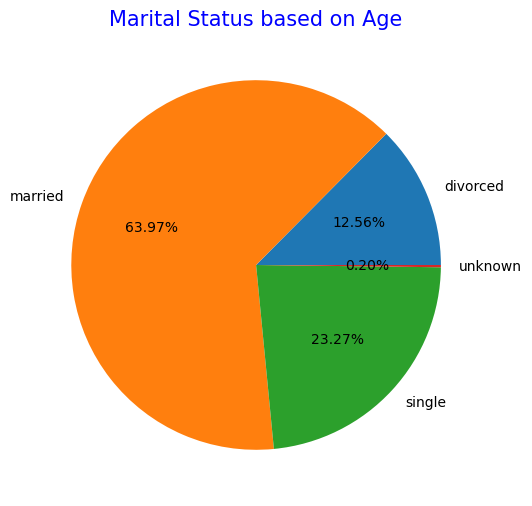

In [88]:
marital_age = data.groupby('marital')['age'].sum().reset_index()
plt.figure(figsize = (8,6))
plt.pie(marital_age['age'], labels = marital_age['marital'], autopct = '%1.2f%%', )
plt.title('Marital Status based on Age', fontsize = 15, color = 'blue')
plt.show()

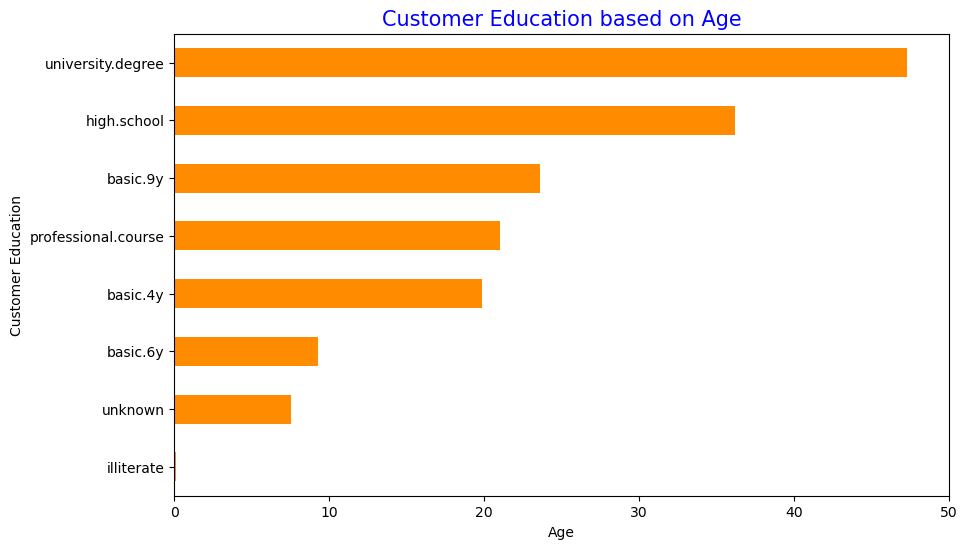

In [89]:
plt.figure(figsize = (10,6))
data.groupby('education')['age'].sum().sort_values(ascending = True).plot(kind = 'barh', color = 'darkorange')
plt.title('Customer Education based on Age', fontsize = 15, color = 'blue')
plt.xlabel('Age')
plt.ylabel('Customer Education')
labels, locations = plt.xticks()
plt.xticks(labels, (labels/10000).astype(int))
plt.show()

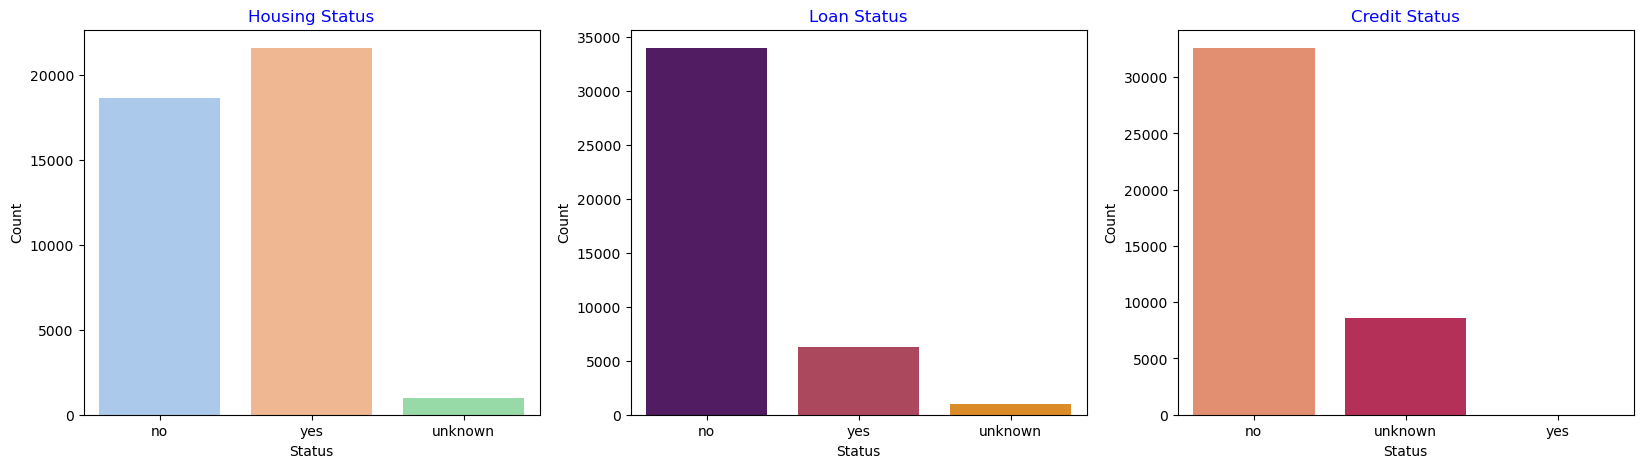

In [90]:
# Set the figure size and create a subplot with 1 row and 3 columns
plt.rcParams['figure.figsize'] = (20, 5)
fig, axes = plt.subplots(1, 3)

# Visualize customer housing status
sns.countplot(data=data, x='housing', palette='pastel', ax=axes[0])
axes[0].set_title('Housing Status', color='b')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Count')

# Visualize customer loan status
sns.countplot(data=data, x='loan', palette='inferno', ax=axes[1])
axes[1].set_title('Loan Status', color='b')
axes[1].set_xlabel('Status')
axes[1].set_ylabel('Count')

# Visualize customer credit status
sns.countplot(data=data, x='default', palette='rocket_r', ax=axes[2])
axes[2].set_title('Credit Status', color='b')
axes[2].set_xlabel('Status')
axes[2].set_ylabel('Count')

# Display all the subplots in a single figure
plt.show()

<Figure size 1000x600 with 0 Axes>

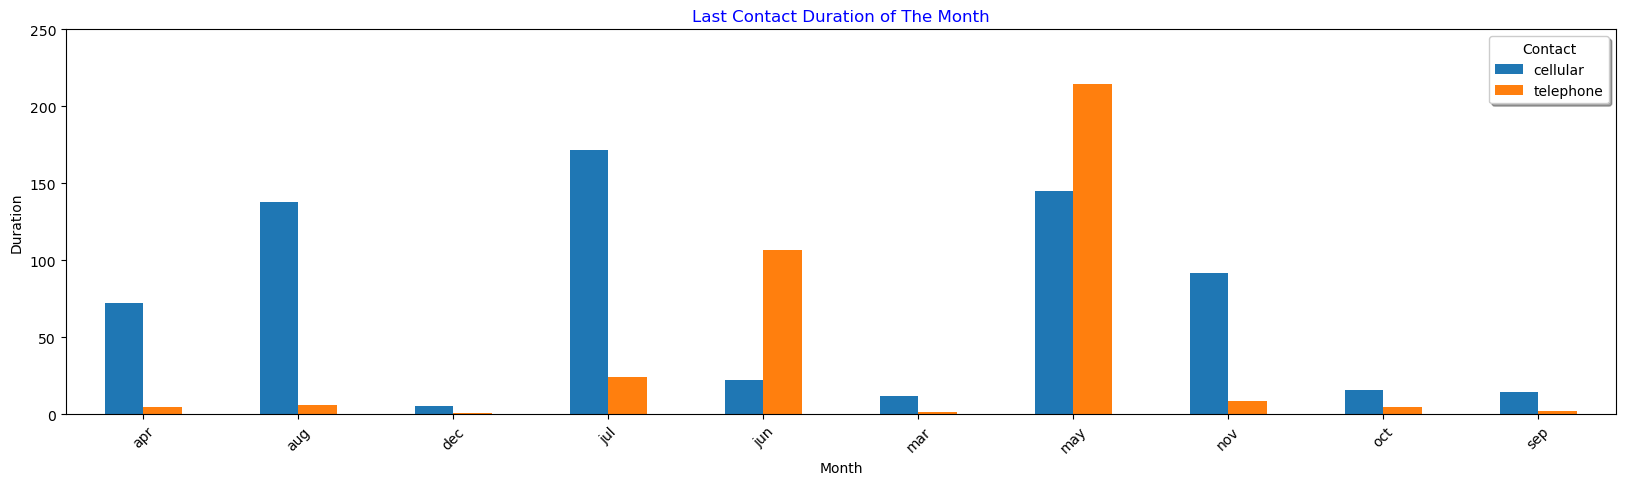

In [91]:
plt.figure(figsize = (10,6))
data.groupby(['month','contact'])['duration'].sum().unstack().plot(kind = 'bar')
plt.title('Last Contact Duration of The Month', color = 'blue')
plt.xlabel('Month')
plt.ylabel('Duration')
plt.legend(bbox_to_anchor = (1,1), shadow = True, title = 'Contact')
labels, locations = plt.yticks()
plt.yticks(labels, (labels/10000).astype(int))
plt.xticks(rotation = 45)
plt.show()

<Figure size 1000x600 with 0 Axes>

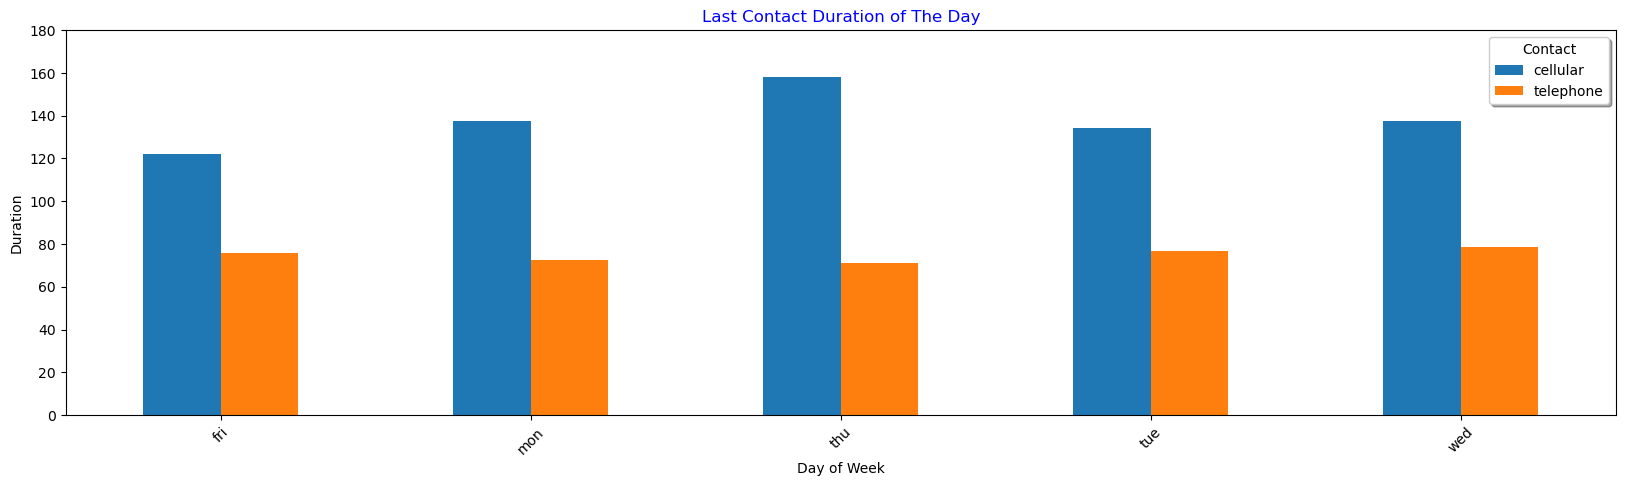

In [92]:
#visualize of last contact duration of the day
plt.figure(figsize = (10,6))
data.groupby(['day_of_week','contact'])['duration'].sum().unstack().plot(kind = 'bar')
plt.title('Last Contact Duration of The Day', color = 'blue')
plt.xlabel('Day of Week')
plt.ylabel('Duration')
plt.legend(bbox_to_anchor = (1,1), shadow = True, title = 'Contact')
labels, locations = plt.yticks()
plt.yticks(labels, (labels/10000).astype(int))
plt.xticks(rotation = 45)
plt.show()

In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [94]:
X = data.iloc[:,:-1]
y = data['y']


# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the final pipeline including preprocessing
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_preprocessed = pipeline.fit_transform(X)

In [95]:
from sklearn.model_selection import train_test_split,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


In [96]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

best_classifier = None
best_accuracy = 0

# Iterate through the classifiers and evaluate their performance
for classifier_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Classifier: {classifier_name}")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print("\n")
    
    # Update the best classifier if needed
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifier = classifier_name

print(f"The best classifier is: {best_classifier}")

Classifier: Random Forest
Accuracy: 0.9113862588006798
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.66      0.46      0.54       935

    accuracy                           0.91      8238
   macro avg       0.79      0.72      0.75      8238
weighted avg       0.90      0.91      0.90      8238



Classifier: Support Vector Machine
Accuracy: 0.9119932022335518
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.68      0.43      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



Classifier: Logistic Regression
Accuracy: 0.9113862588006798
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.67      0.43      0.52       935

In [97]:
# For Training Score
models = [
        ("Random Forest",RandomForestClassifier()),
        ("Support Vector Machine", SVC()),
        ("Logistic Regression" , LogisticRegression()),
        ("K-Nearest Neighbors", KNeighborsClassifier()),
        ("Decision Tree", DecisionTreeClassifier())
    ]
    
for name, model in models:
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        
        print(f"Model: {name}")
        print("Accuracy:", accuracy_score(y_train,y_pred_train))
        print("Classification Report:\n", classification_report(y_train,y_pred_train))

Model: Random Forest
Accuracy: 0.9999696509863429
Classification Report:
               precision    recall  f1-score   support

          no       1.00      1.00      1.00     29245
         yes       1.00      1.00      1.00      3705

    accuracy                           1.00     32950
   macro avg       1.00      1.00      1.00     32950
weighted avg       1.00      1.00      1.00     32950

Model: Support Vector Machine
Accuracy: 0.922701062215478
Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.98      0.96     29245
         yes       0.76      0.46      0.57      3705

    accuracy                           0.92     32950
   macro avg       0.85      0.72      0.76     32950
weighted avg       0.91      0.92      0.91     32950

Model: Logistic Regression
Accuracy: 0.9118057663125948
Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.97      0.95     29245
 

In [98]:
# Model Selection and Hyperparameter Tuning
best_model = None
best_accuracy = 0.0
best_params = None
models = [('Logistic Regression', LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1, 10], 
                                                       'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                                                       'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                                                       'max_iter': [100, 200, 300]}),
        ('SVM', SVC(), {'C': [0.1, 1, 10], 
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
                        'gamma': ['scale', 'auto']}),
        ('KNN', KNeighborsClassifier(), {'n_neighbors': [3, 5, 7],
                                         'weights': ['uniform', 'distance'],
                                         'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                                         'p': [1, 2]}),
        ('Decision Tree', DecisionTreeClassifier(), {'max_depth': [None, 10, 20], 
                                                     'min_samples_split': [2, 5, 10]}),
        ('Random Forest',RandomForestClassifier(),{'n_estimators': [50, 100, 200],
                                                   'max_depth': [None, 10, 20],
                                                   'min_samples_split': [2, 5, 10],
                                                   'min_samples_leaf': [1, 2, 4],
                                                   'max_features': ['auto', 'sqrt', 'log2']})

    ]
for name, model, param_grid in models:
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train,y_train)
        
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
        
    print(f"Model: {name}")
    print("Best Parameters:", grid_search.best_params_)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("="*50)
        
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = name
        best_params = grid_search.best_params_
    
print("Best Model:", best_model)
print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Model: Logistic Regression
Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.9109007040543822
Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.67      0.42      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238

Model: SVM
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.9119932022335518
Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.68      0.43      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238

Model: KNN
Best Parameters: {'algorithm': 'auto', 'n_nei

KeyboardInterrupt: 